In [27]:
#импорты взяты с семинара
import os
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import torchvision.transforms as tt
import torch
import torch.nn as nn
import cv2
from tqdm.notebook import tqdm
from torchvision.utils import save_image
from torchvision.utils import make_grid
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
%matplotlib inline

sns.set(style='darkgrid', font_scale=1.2)

In [2]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
device

device(type='cuda')

In [3]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [4]:
DATA_SHOES_DIR = "/content/gdrive/MyDrive/ImageGenerationProject/datasets/edges2shoes"

In [22]:
def show_images(images, nmax=64):
    fig, ax = plt.subplots(figsize=(40, 25))
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(make_grid(images.detach()[:nmax], nrow=8).permute(1, 2, 0).cpu())
def show_batch(dl, nmax=64):
    for images, _ in dl:
        show_images(images, nmax)
        break

# Уменьшение размера изображений

In [34]:
def get_dataloader(image_size, batch_size, dir):
  """
  Builds dataloader for training data.
  Use tt.Compose and tt.Resize for transformations
  :param image_size: height and wdith of the image
  :param batch_size: batch_size of the dataloader
  :returns: DataLoader object 
  """
  ds = ImageFolder(dir, transform=tt.Compose([
      tt.Resize(image_size),
      tt.CenterCrop(image_size),
      tt.ToTensor(),
      #tt.Normalize(*stats)
  ]))
  loader = DataLoader(ds, batch_size=batch_size, shuffle=True, num_workers=2, pin_memory=True)
  # TODO: resize images, convert them to tensors and build dataloader
  return loader

In [35]:
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [25]:
image_size = 64
batch_size = 128

dataloader = get_dataloader((image_size, image_size * 2), batch_size, DATA_SHOES_DIR)

In [29]:
from torchvision.utils import save_image

In [ ]:
id = 0
for i in tqdm(dataloader):
  for img in i[0]:
    save_image(img, "/content/gdrive/MyDrive/ImageGenerationProject/datasets/edges2shoes_64/train/" + str(id) + ".png")
    id += 1

In [36]:
path = "/content/gdrive/MyDrive/ImageGenerationProject/datasets/edges2shoes_64"

In [37]:
dataloader = get_dataloader((image_size, image_size * 2), batch_size, path)
train_dl = DeviceDataLoader(dataloader, device)


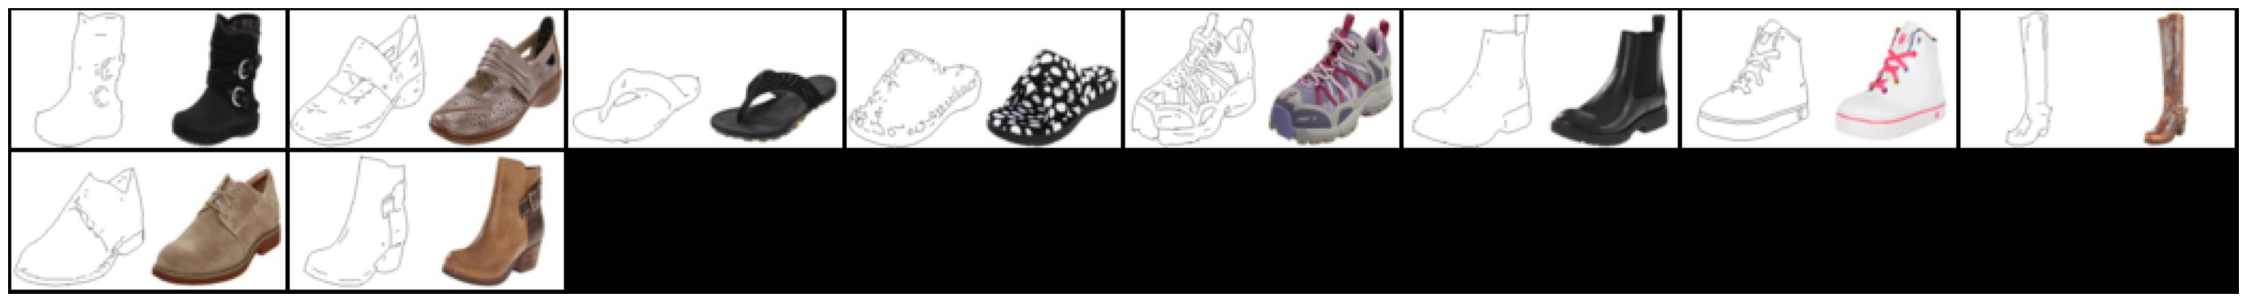

In [40]:
show_images(i[0], 10)